In [1]:
import datetime

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("github-stars-2022-03-04.csv", header=None, names=["repo", "date", "count"])

In [3]:
df["date"] = pd.to_datetime(df.date.str.slice(0, -33))
df.set_index("date", inplace=True)

In [4]:
df_pandas = df["count"][df["repo"] == "pandas-dev/pandas"].resample("W").mean().interpolate()
df_numpy = df["count"][df["repo"] == "numpy/numpy"].resample("W").mean().interpolate()
df_root = df["count"][df["repo"] == "root-project/root"].resample("W").mean().interpolate()
df_awkward0 = df["count"][df["repo"] == "scikit-hep/awkward-0.x"].resample("W").mean().interpolate()
df_awkward1 = df["count"][df["repo"] == "scikit-hep/awkward-1.0"].resample("W").mean().interpolate()
df_uproot3 = df["count"][df["repo"] == "scikit-hep/uproot3"].resample("W").mean().interpolate()
df_uproot4 = df["count"][df["repo"] == "scikit-hep/uproot4"].resample("W").mean().interpolate()

In [5]:
df_uproot = pd.DataFrame({"uproot3": df_uproot3, "uproot4": df_uproot4}).fillna(0)
df_uproot = df_uproot["uproot3"] + df_uproot["uproot4"]

In [6]:
df_awkward = pd.DataFrame({"awkward0": df_awkward0, "awkward1": df_awkward1}).fillna(0)
df_awkward = df_awkward["awkward0"] + df_awkward["awkward1"]

In [7]:
df_all = pd.DataFrame({
    "Pandas": df_pandas,
    "NumPy": df_numpy,
    "ROOT": df_root,
    "Awkward Array": df_awkward,
    "Uproot": df_uproot,
}).fillna(0)

In [8]:
df_all.tail()

,Pandas,NumPy,ROOT,Awkward Array,Uproot
date,,,,,
2022-02-06,32552.28,19520.000000,1650.00,692.888889,447.368421
2022-02-13,32640.96,19593.333333,1659.25,698.166667,448.276316
2022-02-20,32729.64,19666.666667,1668.50,703.444444,449.184211
2022-02-27,32818.32,19740.000000,1677.75,708.722222,450.092105
2022-03-06,32907.00,19788.000000,1687.00,714.000000,451.000000


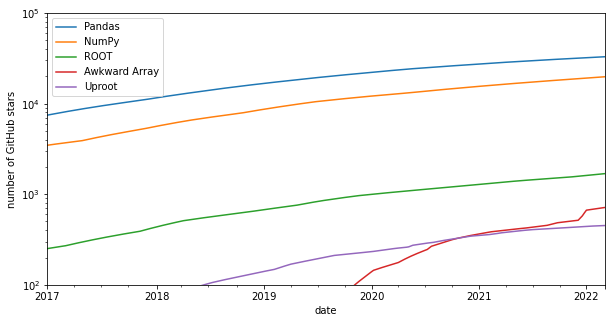

In [9]:
fig, ax = plt.subplots()

df_all.plot(figsize=(10, 5), ax=ax)
ax.set_ylim([100, 100000])
ax.set_yscale("log")
ax.set_xlim([datetime.datetime.fromisoformat("2017-01-01"), datetime.datetime.fromisoformat("2022-03-06")])
ax.set_ylabel("number of GitHub stars")
fig.savefig("PLOTS/github-stars-all-log.svg")
fig.savefig("PLOTS/github-stars-all-log.pdf")

In [10]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

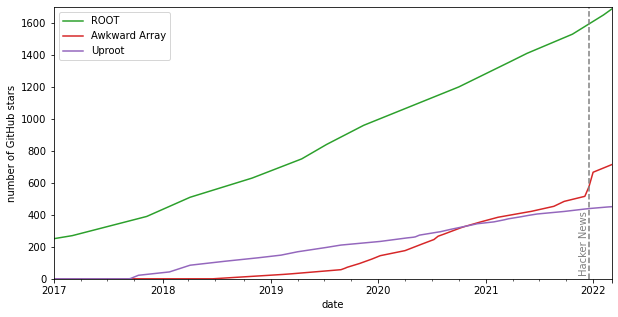

In [11]:
fig, ax = plt.subplots()

df_all[["ROOT", "Awkward Array", "Uproot"]].plot(figsize=(10, 5), ax=ax, color=colors[2:])
ax.set_ylim([0, 1700])
ax.set_yscale("linear")
ax.set_xlim([datetime.datetime.fromisoformat("2017-01-01"), datetime.datetime.fromisoformat("2022-03-06")])
ax.set_ylabel("number of GitHub stars")
ax.axvline(x=datetime.datetime.fromisoformat("2021-12-16"), ls="--", c="gray")
ax.text(datetime.datetime.fromisoformat("2021-12-16"), 0.13, "Hacker News",
        transform=ax.get_xaxis_transform(), rotation=90, ha="right", va="center", c="gray")
fig.savefig("PLOTS/github-stars-root-lin.svg")
fig.savefig("PLOTS/github-stars-root-lin.pdf")

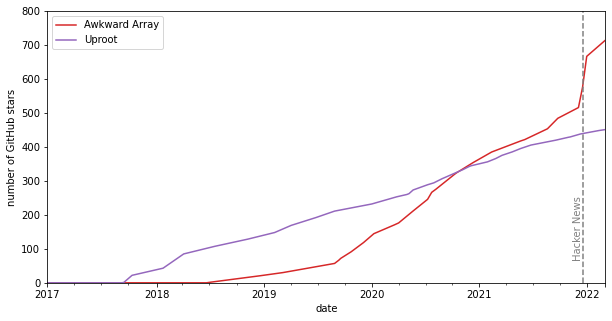

In [12]:
fig, ax = plt.subplots()

df_all[["Awkward Array", "Uproot"]].plot(figsize=(10, 5), ax=ax, color=colors[3:])
ax.set_ylim([0, 800])
ax.set_yscale("linear")
ax.set_xlim([datetime.datetime.fromisoformat("2017-01-01"), datetime.datetime.fromisoformat("2022-03-06")])
ax.set_ylabel("number of GitHub stars")
ax.axvline(x=datetime.datetime.fromisoformat("2021-12-16"), ls="--", c="gray")
ax.text(datetime.datetime.fromisoformat("2021-12-16"), 0.20, "Hacker News",
        transform=ax.get_xaxis_transform(), rotation=90, ha="right", va="center", c="gray")
fig.savefig("PLOTS/github-stars-lin.svg")
fig.savefig("PLOTS/github-stars-lin.pdf")